In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.datasets import load_credit
from yellowbrick.features.pca import PCA, PCADecomposition
from sklearn import preprocessing 
from kmodes.kprototypes import KPrototypes

In [38]:
#LOADING DATA
data = pd.read_csv('mcdonalds_modified.csv')

In [39]:
#DISPLAYING FIRST 5 ROWS
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Visits/year,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,4,Female
1,1,1,0,1,1,1,1,1,1,0,0,2,51,4,Female
2,0,1,1,1,1,1,0,1,1,1,0,1,62,4,Female
3,1,1,0,1,1,1,1,1,0,0,1,4,69,48,Female
4,0,1,0,1,1,1,1,0,0,1,0,2,49,12,Male


c:\Users\Biki\anaconda3\envs\venv1\lib\site-packages\yellowbrick\features\pca.py:458: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self.fig.tight_layout()


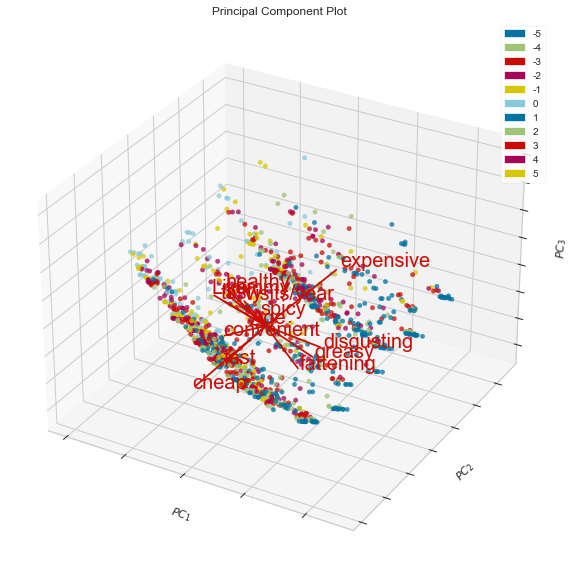

<Axes3DSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [40]:
#3D-Perceptual Map Creation
plt.figure(figsize=(10,10)) 

df = data #CREATING A NEW DATAFRAME TO NOT CHANGE OUT ORIGINAL DATA

X = df.drop(['Gender'], axis='columns') #DROPPING GENDER AS IT IS IRRELEVANT TO CLUSTERING
y = X['Like']




visualizer = PCADecomposition(scale=True,projection = 3,proj_features = True, color = ['red', 'blue']) #projection=3 gives as a 3d plot
visualizer.fit_transform(X, y)
for label in visualizer.ax.texts:
    label.set_size(20)
visualizer.show()

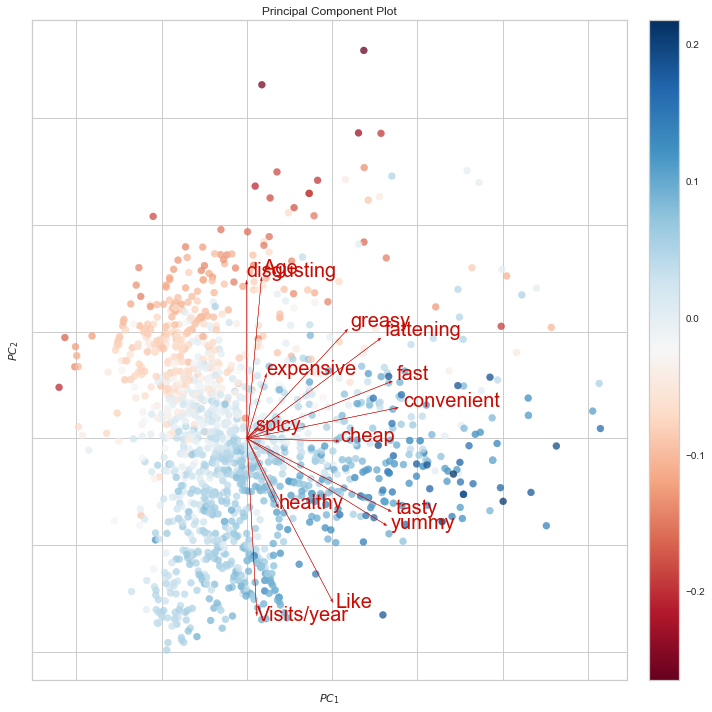

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [42]:
#2D-Perceptual Map Creation
plt.figure(figsize=(10,10))

df_s = data #CREATING A NEW DATAFRAME TO NOT CHANGE OUT ORIGINAL DATA
df_s = df_s.drop(['Gender'], axis='columns')#DROPPING GENDER AS IT IS IRRELEVANT TO CLUSTERING 
df_s = pd.DataFrame(preprocessing.normalize(df_s), columns=df_s.columns)
X = df_s
y = X['Like']




visualizer = PCADecomposition(scale=True,proj_features = True, color = ['red', 'blue'])
visualizer.fit_transform(X, y)
for label in visualizer.ax.texts:
    label.set_size(20)
visualizer.show()

In [15]:
#Increase in greasy, fattening, Age, disgusting leads to decrease in like
#Increase in Visits, healthy, tasty, yummy, cheap, fast, spicy, conveninet leads to increase in like

In [16]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Visits/year,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,4,Female
1,1,1,0,1,1,1,1,1,1,0,0,2,51,4,Female
2,0,1,1,1,1,1,0,1,1,1,0,1,62,4,Female
3,1,1,0,1,1,1,1,1,0,0,1,4,69,48,Female
4,0,1,0,1,1,1,1,0,0,1,0,2,49,12,Male


In [2]:
orig_data = pd.read_csv('mcdonalds.csv')

In [3]:
orig_data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


In [4]:
#DROPPING COLUMNS
orig_data = orig_data.drop(['Gender'], axis='columns')
orig_data = orig_data.drop(['Age'], axis='columns')


In [5]:
orig_data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,VisitFrequency
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,Every three months
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,Every three months
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,Every three months
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,Once a week
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,Once a month


In [6]:
#USING KPROTOTYPES TO DIVIDE THE DATA INTO THE TWO CLUSTERS SEEN IN PCA
kproto = KPrototypes(n_clusters=2, verbose=2)
clusters = kproto.fit_predict(orig_data, categorical=[0,1,2,3,4,5,6,7,8,9,10, 12])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 252, ncost: 10387.130503475539
Run: 1, iteration: 2/100, moves: 30, ncost: 10381.574776728317
Run: 1, iteration: 3/100, moves: 0, ncost: 10381.574776728317
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 303, ncost: 10772.929172087328
Run: 2, iteration: 2/100, moves: 108, ncost: 10471.527442974739
Run: 2, iteration: 3/100, moves: 58, ncost: 10404.886753384946
Run: 2, iteration: 4/100, moves: 32, ncost: 10381.861006213216
Run: 2, iteration: 5/100, moves: 1, ncost: 10381.833192703354
Run: 2, iteration: 6/100, moves: 0, ncost: 10381.833192703354
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 143, ncost: 10422.314969927289
Run: 3, iteration: 2/100, moves: 38, ncost: 10390.122

In [7]:
#CREATING A DICTIONARY OF ALL THE CLUSTERS FROM DATA
cluster_dict = []
for c in clusters:
    cluster_dict.append(c)

In [9]:
#ADDING A COLUMN WHICH GIVES THE CLUSTER EACH ROW BELONGS TO
orig_data['cluster']=cluster_dict

In [10]:
#DISPLAYING DATA
orig_data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,VisitFrequency,cluster
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,Every three months,1
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,Every three months,0
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,Every three months,0
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,Once a week,0
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,Once a month,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-5,Once a year,1
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,2,Once a week,0
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,3,Once a month,0
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,4,Every three months,0


In [14]:
#PRINTING FIRST CLUSTER
orig_data[orig_data['cluster']==0]

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,VisitFrequency,cluster
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,Every three months,0
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,Every three months,0
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,Once a week,0
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,Once a month,0
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,2,Every three months,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,1,Every three months,0
1447,No,Yes,No,Yes,Yes,No,No,Yes,Yes,No,No,0,Once a month,0
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,2,Once a week,0
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,3,Once a month,0


In [15]:
#PRINTING SECOND CLUSTER
orig_data[orig_data['cluster']==1]

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,VisitFrequency,cluster
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,Every three months,1
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,-5,Once a year,1
10,No,Yes,No,Yes,No,Yes,Yes,No,No,No,Yes,-2,Every three months,1
14,No,Yes,No,Yes,No,Yes,No,No,Yes,No,No,-3,Once a month,1
18,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,-4,Every three months,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,No,No,No,No,No,No,No,No,Yes,No,Yes,-5,Once a year,1
1435,No,Yes,No,Yes,Yes,Yes,Yes,No,No,No,Yes,-5,Never,1
1444,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,-3,Never,1
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-5,Once a year,1


In [ ]:
#Conclusions are similar from PCA. 
#(Cluster - 1)
#Peole dislike the food because they find it expensive, 
#unhealthy, fattening, not spicy enough, not tasty and not yummy
#(Cluster - 2)
#People like the food as they find it convenient, 
#fast, cheap, tasty, amd healthy